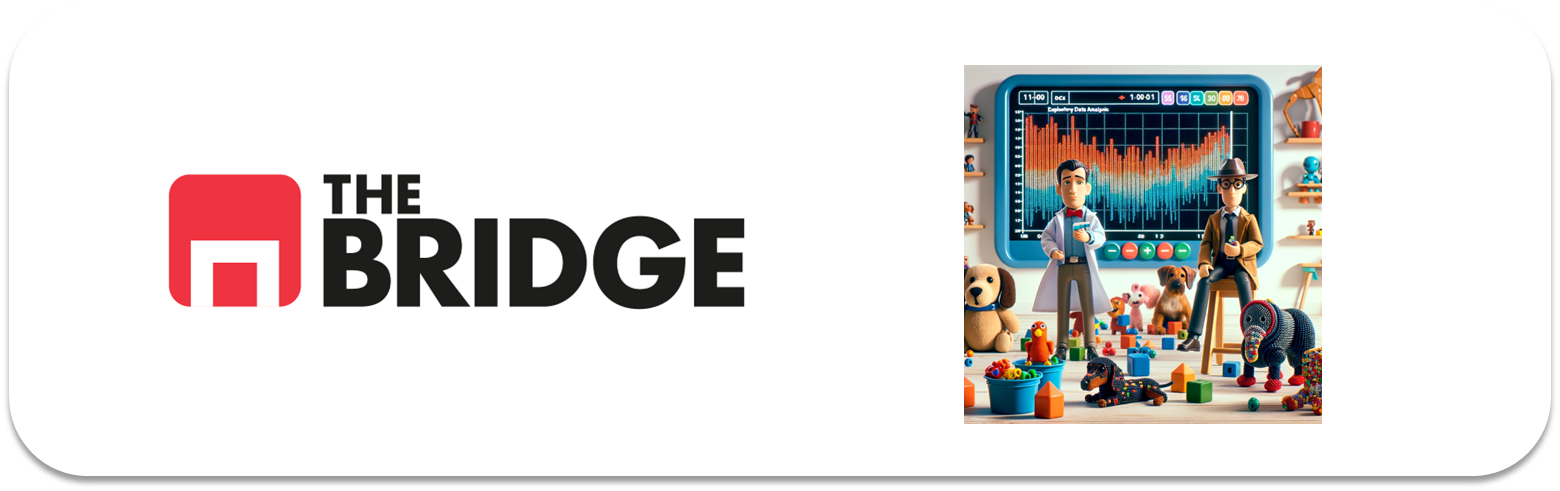

## Análisis de Datos (Bivariante): Test de relación entre categórica y numérica

Para ver si existe una relación estadística significativa entre una relación categórica y una numérica podemos aplicar varios test en función de la cardinalidad de la variable categórica y de otras condiciones. Veamos algunos ejemplos aplicándolo a nuestos datasets guía, y para ello, sí, ejecuta la celda siguiente:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms

df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

### Caso 1. Seguros: Relacion response-CLV


Como siempre primero recordamos que pinta tienen nuestros valores por separados y el análisis visual que hicimos cuando los combinamos hace ya unas cuantas sesiones

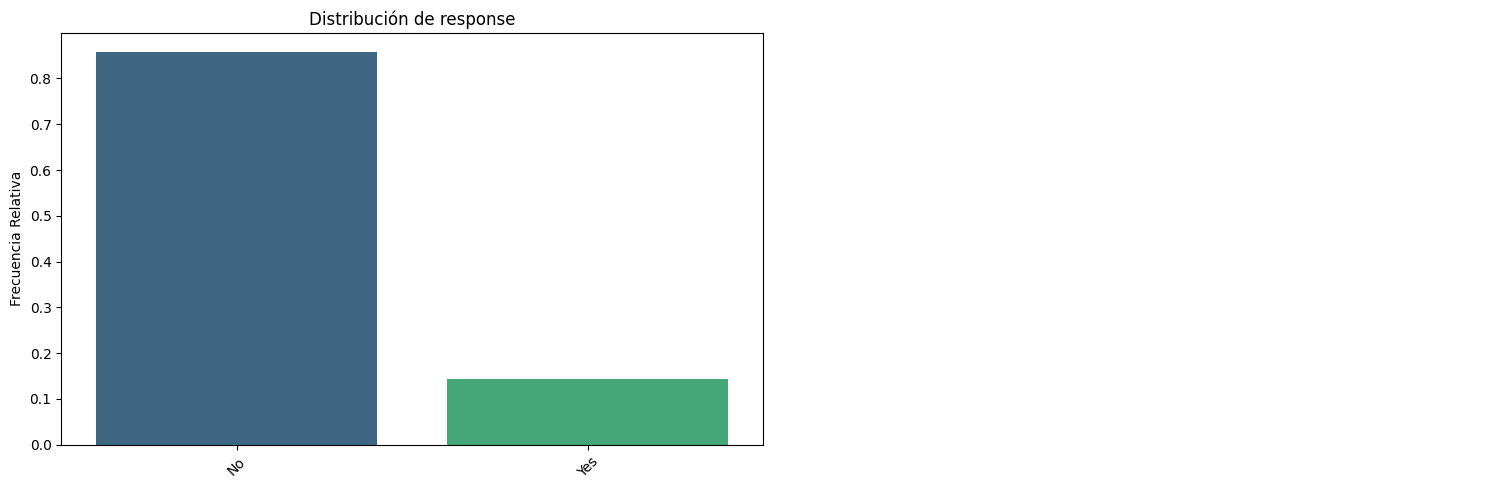

In [4]:
pinta_distribucion_categoricas(df_seguros,["response"], relativa= True)

(2,)


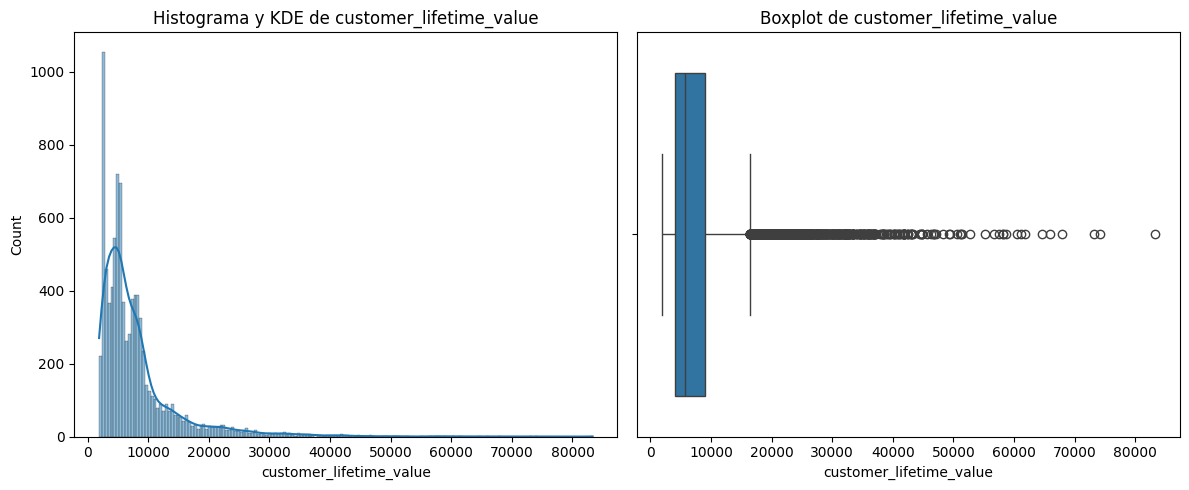

In [5]:
plot_combined_graphs(df_seguros,["customer_lifetime_value"])

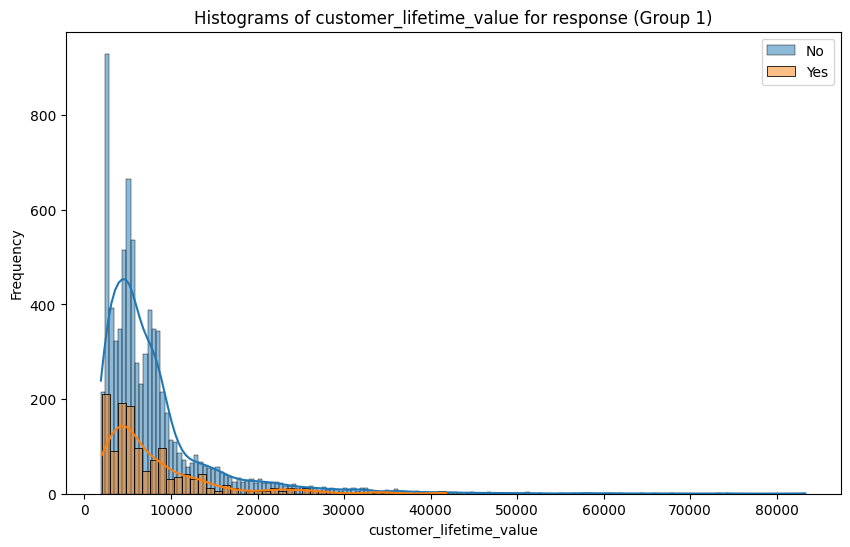

In [6]:
plot_grouped_histograms(df_seguros, cat_col="response",num_col="customer_lifetime_value", group_size= 2)

Como puedes ver, `response` es una variable binaria, en esa situación se suele utilizar el test t-Student si se cumplen determinadas condiciones (entre otras que los valores estén distribuidos como una normal, es decir una campana  de gauss) pero que no se cumplen así que nosotros usaremos [la prueba U de Mann-Whitney](https://datatab.es/tutorial/mann-whitney-u-test):

#### Aplicando la prueba U de Mann-Whitney:

**#0 Importar el test de scipy**

In [7]:
from scipy.stats import mannwhitneyu # Sí, de scipy.stats :-)


**#1 Separar los datos en dos grupos según la variable categórica**


In [8]:
grupo_a = df_seguros.loc[df_seguros.response == "Yes"]["customer_lifetime_value"]
grupo_b = df_seguros.loc[df_seguros.response == "No"]["customer_lifetime_value"]


**#2 Aplicar la prueba y mostrar los resultados**

In [9]:

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)


Estadístico U: 5060988.0
Valor p: 0.5168872245291198


**#3 Interpretación del valor p (p-value)**

En este caso la hipótesis nula (o directora) es que no hay diferencia estadística significativa entre las medianas de los valores, si hubieramos obtenido un p-value por debajo de 0.05, hubieramos rechado la hipótesis nula y habríamos dicho que hay confianza estadística en que las medianas de cada grupo son diferentes para cada valor y que hay una relación entre los valores de la categórica y los de la numérica. Como no es el caso no podemos rechazar la hipótesis. Es decir no podemos decir que haya esa relación entre las dos variables.

En resumen: 
* Según este test, no podemos asegurar que la respuesta y el CLV tengan relación. Lo que reafirma nuestra confirmación visual, pero no confirma. 

### Caso 2. Viajes: Relación entre aircompany e ingresos

Pintamos los valores:

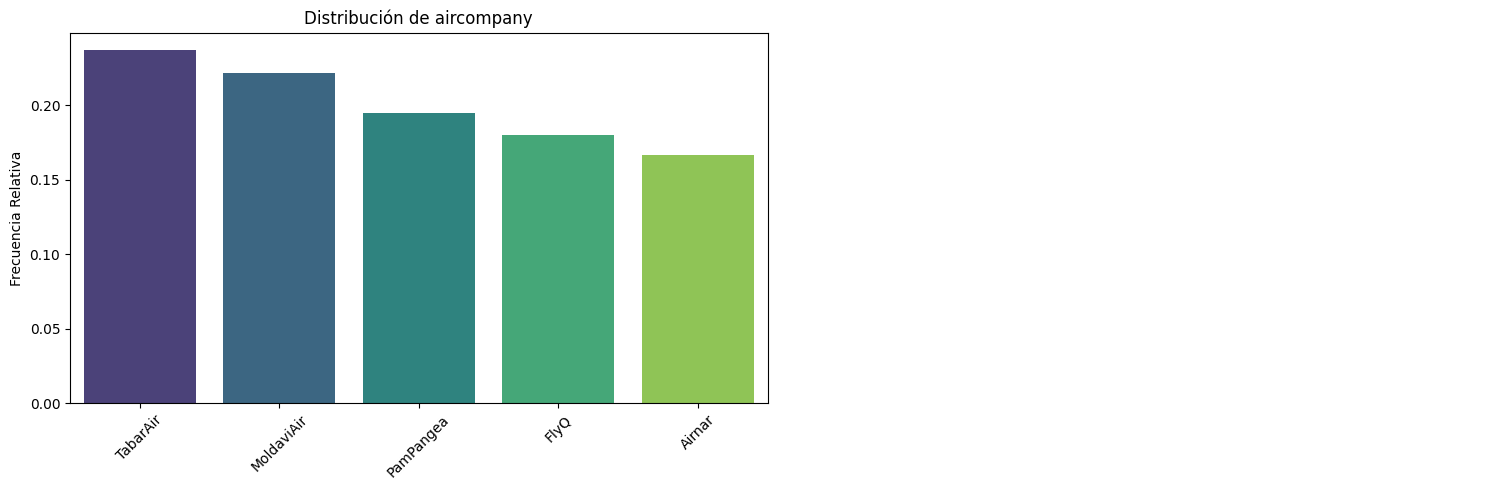

In [10]:
pinta_distribucion_categoricas(df_air_jun,["aircompany"], relativa= True)

(2,)


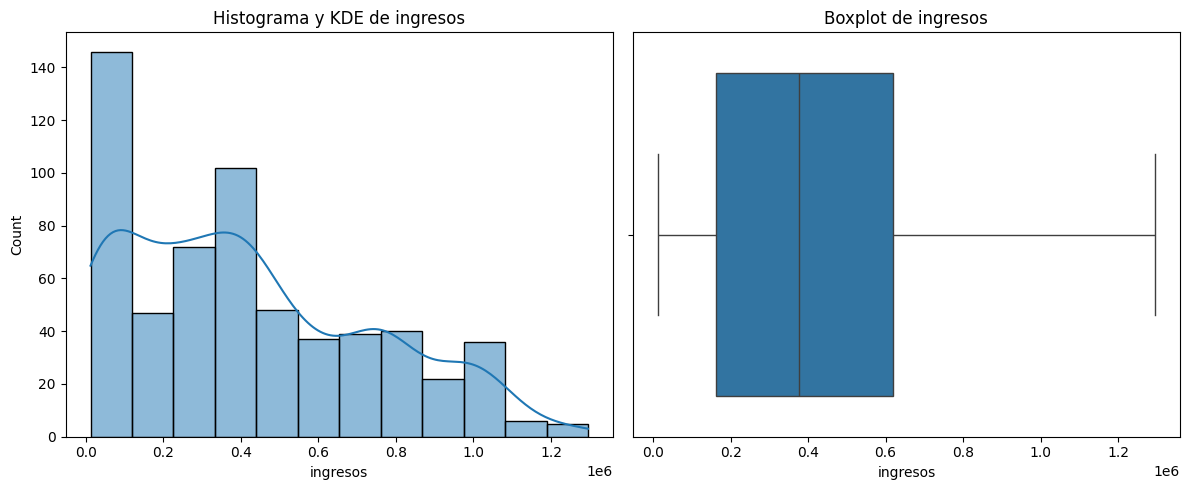

In [11]:
plot_combined_graphs(df_air_jun, ["ingresos"])

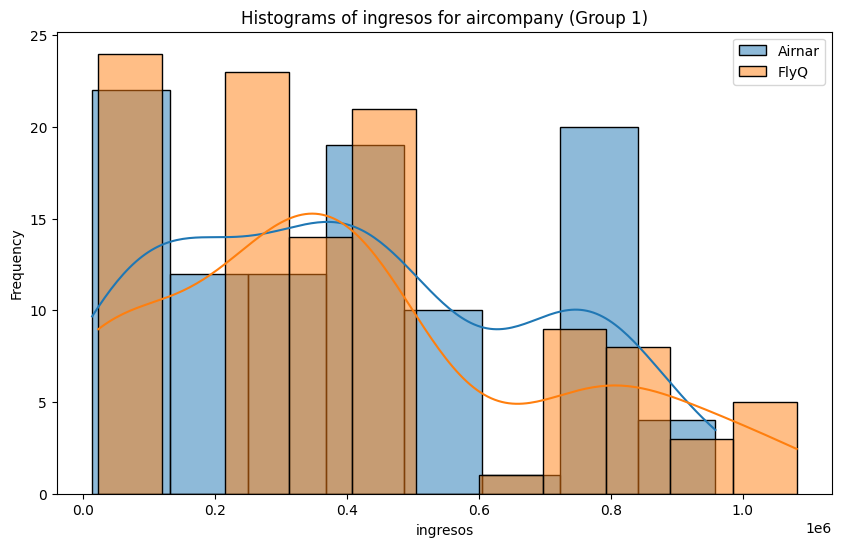

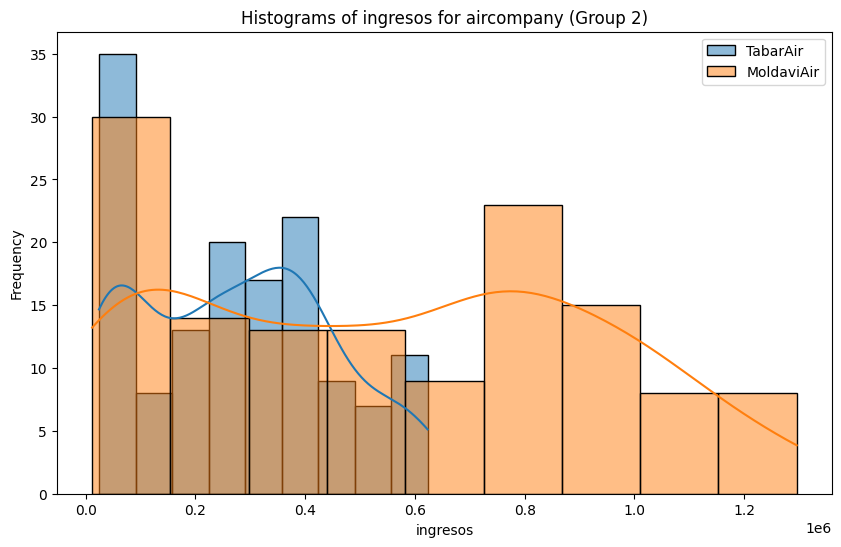

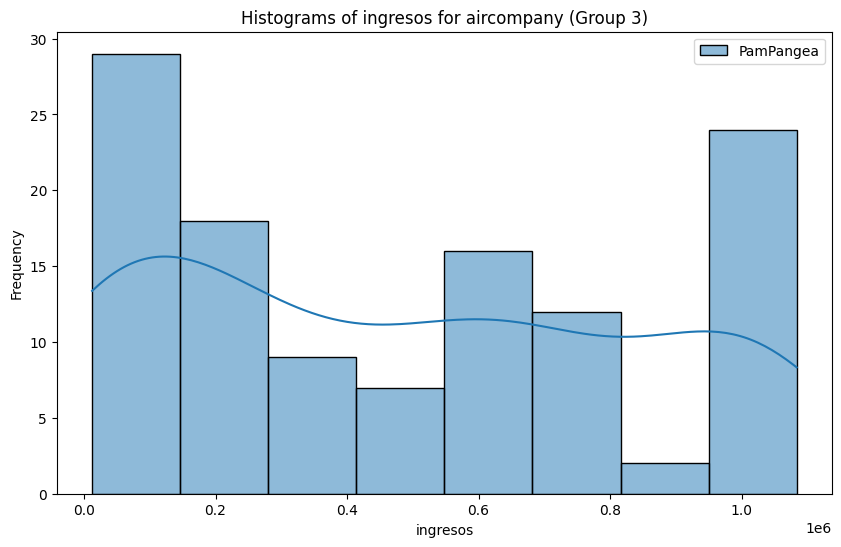

In [12]:
plot_grouped_histograms(df_air_jun, "aircompany","ingresos",group_size= 2)

En este caso la variable categórica no es binaria y no podemos usar la prueba U. Para estos casos empleamos el método ANOVA.

#### Aplicando ANOVA:

Nota: ANOVA es toda una metodología de análisis de varianza que entre otras cosas nos permite este "test" con categóricas y numéricas, tiene tambiéns sus suposiciones de partida que puede que no estemos cumpliendo (pero se escapa del ámbito del bootcamp cubrir este punto). Aquí encontrarás más información y detalle sobre el análsis de varianza: [Anova](https://datatab.es/tutorial/anova)

**#1 Importar librerias**

In [13]:

from scipy import stats


**#2 Separar en grupos según los valores de las categorías**

In [14]:
grupos = df_air_jun['aircompany'].unique()  # Obtener los valores únicos de la columna categórica, en este caso la compañía área
ingresos_por_company = [df_air_jun[df_air_jun['aircompany'] == grupo]['ingresos'] for grupo in grupos] # obtenemos los ingresos por compañía y los incluimos en una lista
ingresos_por_company

[0       14232.65
 9      110108.07
 17     518685.45
 21     799063.90
 23     432558.22
          ...    
 573    732878.07
 577    754191.00
 580    928050.52
 596     87307.63
 597    339943.47
 Name: ingresos, Length: 100, dtype: float64,
 1       468527.19
 33      273824.24
 36      235350.43
 40       25642.94
 41      417965.59
           ...    
 575     429377.42
 581    1004810.48
 589     398905.47
 590      31227.48
 598     752212.98
 Name: ingresos, Length: 108, dtype: float64,
 2      584789.19
 4      438535.07
 10     111056.67
 12     184079.01
 13      46200.30
          ...    
 572    258737.92
 582    423371.06
 587    404542.35
 593    550268.31
 599    330320.81
 Name: ingresos, Length: 142, dtype: float64,
 3       233342.51
 5       728045.68
 6        13805.52
 11      764998.83
 16      719577.55
           ...    
 578      12372.41
 579     409713.51
 583    1006880.11
 584      70674.57
 585     225493.20
 Name: ingresos, Length: 133, dtype: float64,
 7

**#3 Aplicamos el ANOVA**

In [15]:

f_val, p_val = stats.f_oneway(*ingresos_por_company) # El método * (igual que cuando vimos *args hace mil años) 
                                                    # lo que hace es separar todos los elementos de la lista y pasarselos como argumento a la función
print("Valor F:", f_val)
print("Valor p:", p_val)


Valor F: 15.686872918809376
Valor p: 3.267745855663723e-12


**#4 Interpretación del ANOVA**

En este caso la hipótesis nula vuelve a ser que las distribuciones de valores para cada compañía no tienen relación estadística, pero ahora como el p-value es menor que 0.05, rechazamos la hipótesis nula y reafirmamos la alternativa o contraria, es decir que sí que los ingresos no se parecen para cada compañía y que podemos extrapolar ese valor a otro conjuto de compañías con datos similares.

## RESUMEN PASOS ANALISIS BIVARIANTE

1. Establece una lista de combinaciones que quieras analizar sí o sí: Básate en las preguntas e hipótesis de partida que tengas, en la prioridad de las variables y en los resultados y notas de tu análisis univariante.
2. Aplica a cada combinación lo que has visto en el workout. Ahora ya empezarán a salir mensajes y conclusiones que sí pueden aparecer en el informe y presentación finales. Puede que surjan otras hipótesis y tengas que volver atrás.
    * Si tienes muestras y quieres extrapolar resultados, acuerdate de aplicar el contraste de hipótesis.
3. Haz una lista de preguntas que puedas responder ya y busca esa respuesta (ya no va de analizar sistemáticamente sino de filtrar, operar, agrupar los dataframes hasta que encuentres ese respuesta). Por ejemplo: No hace falta esperar para ver con más detalle qué ocurre con las ofertas de tipo 2 las que tenían más exito que el resto de ofertas.
4. Lánzate a analizar varias variables a la vez (más de 2) siempre guiado por las preguntas e hipótesis. 